### Gaussian mixture

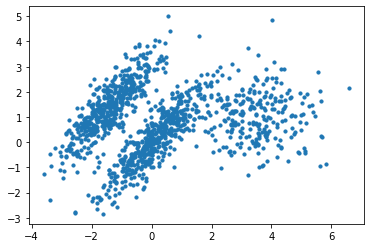

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plt.scatter(X[:, 0], X[:, 1], s=10)


### Making a GMM

In [2]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, n_init=10, random_state=0)
model.fit(X)


GaussianMixture(n_components=3, n_init=10, random_state=0)

### Note that n_init=1 by default in GaussianMixture! (c.f., n_init=10 by default in k-means)

In [3]:
help(GaussianMixture)

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      'full'
 |          each compo

### Let's look at the parameters that the GMM's Expectation Maximization algorithm estimated:

In [4]:
model.weights_

array([0.3902064 , 0.20970929, 0.40008431])

In [5]:
model.means_

array([[ 0.0512132 ,  0.07512971],
       [ 3.39854326,  1.05926051],
       [-1.4076241 ,  1.42704927]])

In [6]:
model.covariances_

array([[[ 0.68780591,  0.79597839],
        [ 0.79597839,  1.21232694]],

       [[ 1.14901133, -0.03241901],
        [-0.03241901,  0.95484861]],

       [[ 0.63480459,  0.72971575],
        [ 0.72971575,  1.16110086]]])

### Q: Are these making sense?

### GMM can make predictions as to which cluster each data point belongs to (hard clustering) or the probabilities that it came from each cluster (soft clustering). 

In [7]:
model.predict(X)

array([0, 0, 2, ..., 1, 1, 1])

In [8]:
np.unique(model.predict(X))

array([0, 1, 2])

In [9]:
model.predict_proba(X)

array([[9.76688618e-01, 2.33107018e-02, 6.80230786e-07],
       [9.82774531e-01, 1.65481663e-02, 6.77302883e-04],
       [7.42085667e-05, 2.04358925e-06, 9.99923748e-01],
       ...,
       [4.21582331e-07, 9.99999578e-01, 2.17682412e-26],
       [4.93027253e-16, 1.00000000e+00, 1.50345348e-41],
       [2.19825399e-15, 1.00000000e+00, 8.24833927e-41]])

In [10]:
# score_samples tells you the "probability densities"

model.score_samples(X)

array([-2.60753797, -3.57117632, -3.32962239, ..., -3.51337454,
       -4.39800533, -3.80760349])

### Let's visualize the results by plotting the data colored by the labels. We will also plot the cluster centers.

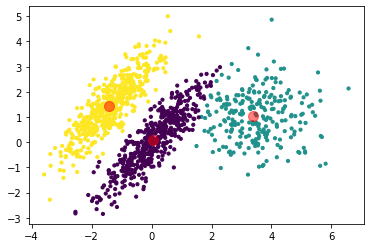

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), s=10, cmap='viridis')

plt.scatter(model.means_[:, 0], model.means_[:, 1], c='red', s=100, alpha=0.5)


### We can also plot the decision boundaries and the density contours of the model. 

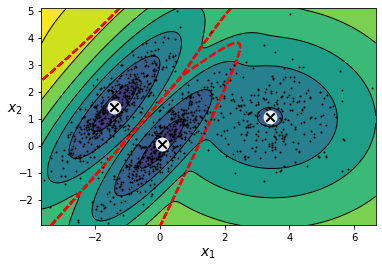

In [12]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    # score_samples tells you the "probability densities"
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

plot_gaussian_mixture(model, X)

### TODO: How does k-means do for this dataset?

### How do we determine the number of clusters?

In [13]:
model_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=0).fit(X) for k in range(1, 11)]

bics = [model.bic(X) for model in model_per_k]
aics = [model.aic(X) for model in model_per_k]

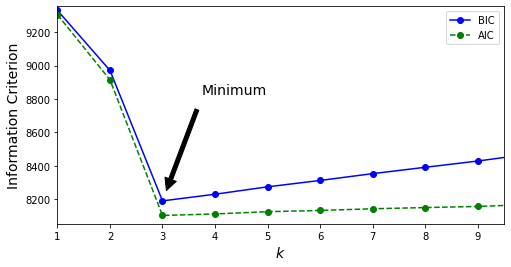

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()

### Clustering for semi-supervised learning

### Let's load the MNIST data.

In [15]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X = X[::10]
y = y[::10]

# Scale the grey-scale values to be between 0 and 1 instead of 0 and 255 for better numeric stability.
X = X / 255.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape

(5250, 784)

### When we know all the ground truth answers.

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9302857142857143

We got 93% accuracy.

### When we know answers to 100 data points.

In [17]:
from sklearn.ensemble import RandomForestClassifier

n_labeled = 100

model = RandomForestClassifier(n_estimators=100, random_state=0)

# Here, I'm fitting the model using only 100 data points.
model.fit(X_train[:n_labeled], y_train[:n_labeled])

# Then I'm returning the accuracy of the model on the test dataset.
model.score(X_test, y_test)

0.66

We got only 66 % accuracy.

### Let's create 100 clusters.

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_labeled, random_state=0)

# X_digits_dist will save the distance from each data point to each cluster centers.
X_digits_dist = kmeans.fit_transform(X_train)

# Here, I'm choosing the data point that is the closest to each cluster center.
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [19]:
X_digits_dist

array([[ 7.99617829,  8.5816781 , 10.27796137, ...,  9.45728531,
         9.50163345,  7.64184407],
       [ 7.44708523,  8.50516536,  7.97578882, ...,  9.4388953 ,
         7.8667414 ,  6.31652231],
       [ 7.20776386,  7.71123562,  7.65627833, ...,  9.59950427,
         7.7418938 ,  6.52350547],
       ...,
       [ 8.4363966 , 10.52682079,  9.42079967, ...,  8.57963878,
         8.69545135,  8.66733268],
       [ 7.07889833,  6.26872771,  5.56034953, ...,  9.19767861,
         7.82288256,  8.4971332 ],
       [ 7.64837414,  9.04360898,  8.82360797, ...,  8.50242799,
         7.50350601,  6.35188148]])

In [20]:
representative_digit_idx

array([4374, 4842, 4871, 4283, 3095,  574, 3425, 3166, 4474, 1929, 2630,
       1966, 1168, 1781, 2373, 2293,  841, 4666, 1856, 1139, 2685, 1593,
        960, 2670, 1434, 3455,  985, 4565, 4778, 2992, 1274, 1562, 5189,
        721,   72, 4961, 1085, 4839, 3073, 1983, 4592, 2434,  381,  153,
       3050, 1834,  177,  206, 3964, 5217, 2798, 1670, 3933, 3348, 2448,
        421, 1932, 1226, 3737,  735, 5007, 2270, 5110,  140, 4822, 3109,
       2454, 1988,  711, 1254,  248, 1748, 3003, 2752,  585, 5077,  271,
       3695, 4101, 1426, 4012, 3452, 4459, 4982,  995, 2135, 1782, 4307,
        595, 3848, 2483, 3028, 1135, 5209, 3609, 3963,  573,  664, 3019,
         53])

In [21]:
X_representative_digits.shape

(100, 784)

Okay, so there are only 100 data points, one per cluster.

### These are the representative data points.

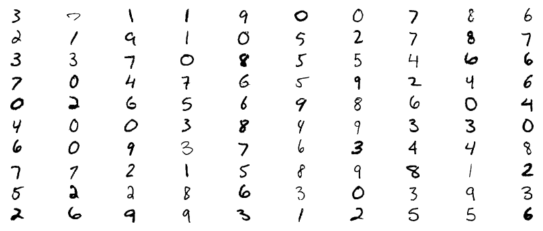

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(n_labeled // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')


### And these are their ground truth values.

In [23]:
y_train[representative_digit_idx]

array([3, 7, 1, 1, 9, 0, 0, 7, 8, 6, 2, 1, 9, 1, 0, 5, 2, 7, 8, 7, 3, 3,
       7, 0, 8, 5, 5, 4, 6, 6, 7, 0, 4, 7, 6, 5, 9, 2, 4, 6, 0, 2, 6, 5,
       6, 9, 8, 6, 0, 4, 4, 0, 0, 3, 8, 4, 9, 3, 3, 0, 6, 0, 9, 3, 7, 6,
       3, 4, 4, 8, 7, 7, 2, 1, 5, 8, 9, 8, 1, 2, 5, 2, 2, 8, 6, 3, 0, 3,
       9, 3, 2, 6, 9, 9, 3, 1, 2, 5, 5, 6], dtype=uint8)

### I will same them in y_representative_digits.

In [24]:
y_representative_digits = y_train[representative_digit_idx]

### Now we have a dataset with just 100 labeled data points, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better.

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_representative_digits, y_representative_digits)
model.score(X_test, y_test)

0.7714285714285715

The score itself is not outstanding, but it's about 11 % better!

### TODO: 77 % accuracy is still poor compared with the fully supervised classification result (93 %). Any idea how to further improve the performance??